In [1]:
from matplotlib import pyplot as plt 

In [2]:
import json

In [3]:
import re

In [4]:
import numpy as np

In [5]:
def bucket(x, size):
    l = len(x)
    buckets = []
    i = 0
    while i < l:
        buckets.append(sum(x[i:i+size])/len(x[i:i+size]))
        i+=size
    return buckets

In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [41]:
class LogReader():
    def __init__(self, filename, keys):
        self.file = open(f'{filename}')
        self.rgx = re.compile(f'^({"|".join(keys)}).*')
        self.matches = {}
        for key in keys:
            self.matches[key]=[]
    
    def grab(self):
        line = next(self.file, None)
        while line:
            match = self.rgx.match(line)
            if match:
                self.matches[match.group(1)].append(float(line.strip().split(' ')[-1]))
            line = next(self.file, None)
        return self.matches

In [42]:
keys = [
    'Batch',
    'train zero one loss',
    'train value loss',
    'train prediction loss',
    'validation zero one loss',
    'validation value loss',
    'validation prediction loss',
]

#### Bucket Size

In [43]:
bucket_size = 10

In [44]:
readers = {}
matches = {}

#### Timestamp of run

In [78]:
files = [
    'logs/train_earl_20211026-1235.log'
]

In [79]:
for file in files:
    if file not in readers:
        readers[file] = LogReader(file, keys)
        matches = readers[file].grab()

## Get matching log lines

In [80]:
file = files[0]

In [81]:
matches = readers[file].grab()

## Current Epoch

In [82]:
batch = matches['Batch'][-1]
batch

489.0

## Training loss

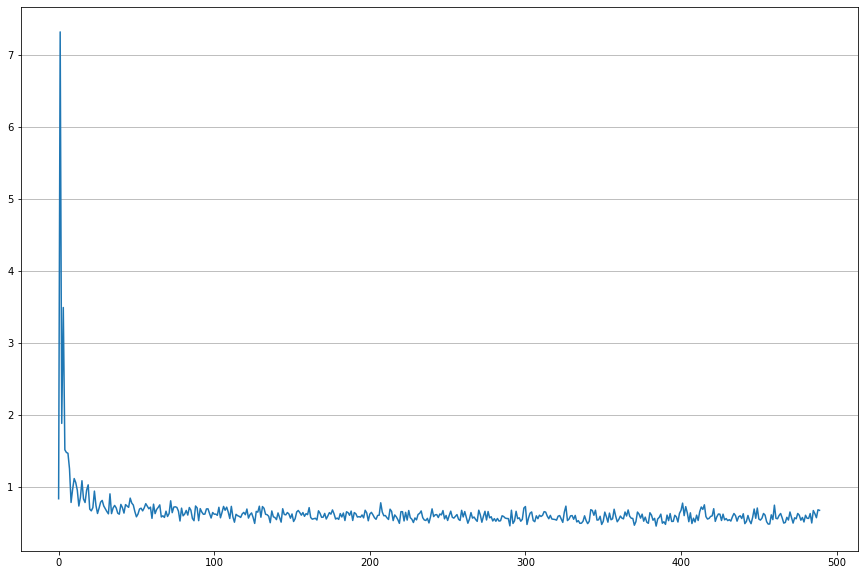

In [83]:
training_loss = matches['train prediction loss']
plt.figure(figsize=(15,10))
plt.grid(axis='y')
plt.plot(training_loss)

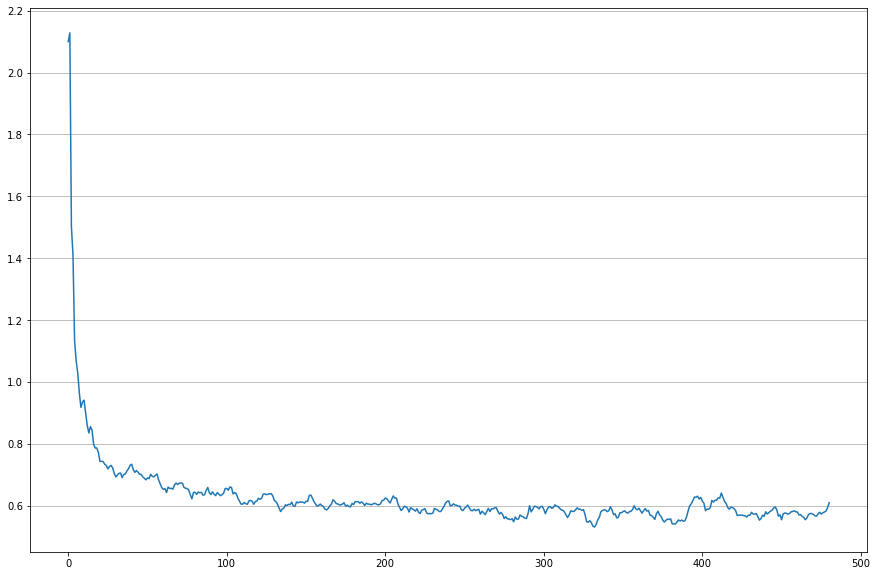

In [84]:
training_loss = matches['train prediction loss']
plt.figure(figsize=(15,10))
plt.grid(axis='y')
plt.plot(moving_average(training_loss,10))

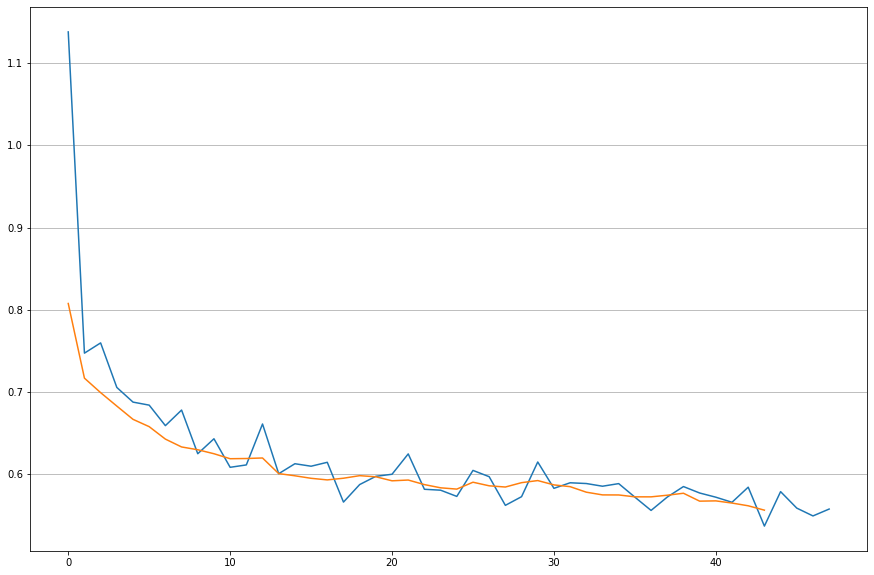

In [85]:
validation_loss = matches['validation prediction loss']
plt.figure(figsize=(15,10))
plt.grid(axis='y')
plt.plot(validation_loss)
plt.plot(moving_average(validation_loss,5))